In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('data_pengunjung.csv')

In [3]:
df

,Visitor_ID,Nama,No_KTP,Usia,Lama_Kunjungan,Status_Pengunjung,Area_Dominan,Banyak_Kunjungan
0,1,Dr. Daniel Martin DDS,101-67-0182,50,160,0,Artefak,8
1,2,Nathaniel Sanders,726-05-2029,50,136,0,Berlian,1
2,3,Danielle Williams,827-53-6091,53,164,0,Lukisan,4
3,4,Becky Simpson,533-22-8981,54,282,0,Kendaraan,6
4,5,Timothy Castro,731-94-3190,23,113,0,Artefak,9
...,...,...,...,...,...,...,...,...
315,316,Kathy Huerta,238-86-0831,25,62,0,Berlian,3
316,317,Candice Ford,820-96-9871,64,174,0,Geologi,3
317,318,Tommy Wilson,117-34-3179,58,211,0,Geologi,6
318,319,Justin Harding,056-22-7167,31,92,0,Patung,1


**Line Plot (Grafik Garis)**

Laura membuat grafik garis yang menggambarkan fluktuasi jumlah pengunjung museum selama beberapa hari sebelum dan sesudah pencurian. Dia melihat lonjakan pengunjung pada hari-hari sebelum pencurian, yang mengindikasikan bahwa pencuri mungkin telah menyamar sebagai pengunjung biasa.

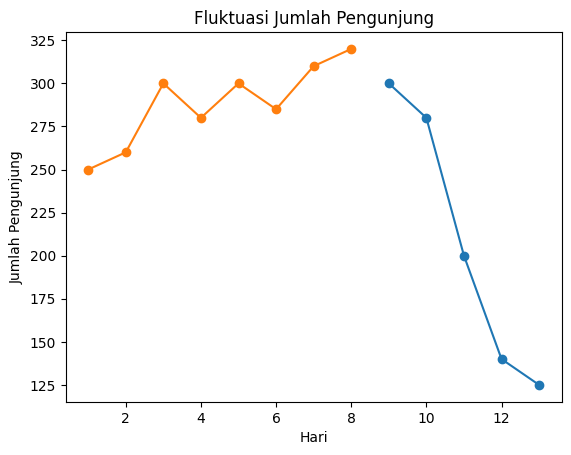

In [4]:
# Minggu setelah pencurian
weeks_after_theft = np.arange(9, 14)
visitors_after_theft = np.array([300, 280, 200, 140, 125])

# Minggu sebelum pencurian
weeks_before_theft = np.arange(1, 9)
visitors_before_theft = np.array([250, 260, 300, 280, 300, 285, 310 ,320])

# Line Plot
plt.plot(weeks_after_theft, visitors_after_theft, marker='o')
plt.plot(weeks_before_theft, visitors_before_theft, marker='o')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengunjung')
plt.title('Fluktuasi Jumlah Pengunjung')
plt.show()

**Bar Plot (Diagram Batang)**

Laura membuat diagram batang yang menunjukkan jumlah pengunjung dengan dominan area yang mereka kunjungi . Dari sini, dia dapat melihat bahwa pengunjung di area berlian memang banyak pada hari itu.

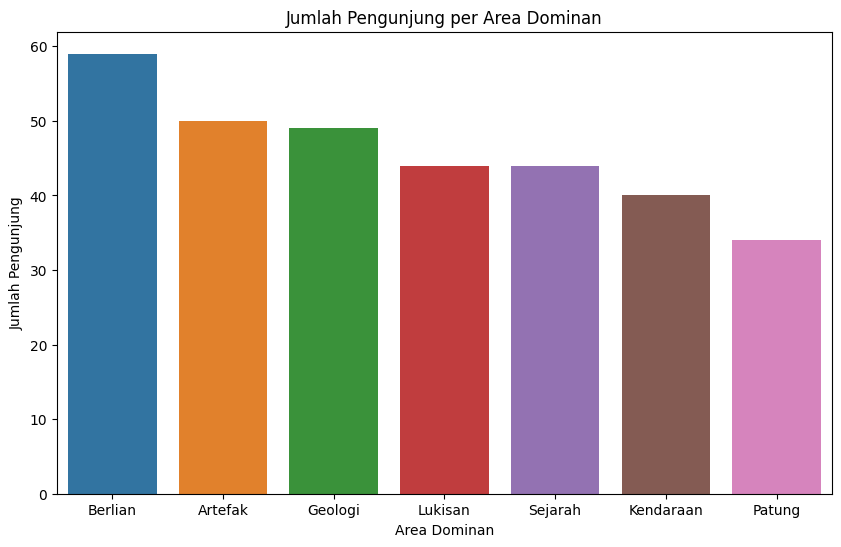

In [5]:
# Menghitung jumlah pengunjung per area dominan
area_counts = df["Area_Dominan"].value_counts()

# Membuat barplot untuk jumlah pengunjung per area dominan
plt.figure(figsize=(10, 6))
sns.barplot(x=area_counts.index, y=area_counts.values)
plt.title("Jumlah Pengunjung per Area Dominan")
plt.xlabel("Area Dominan")
plt.ylabel("Jumlah Pengunjung")
plt.show()

**Scatter Plot (Grafik Sebaran)**

Laura menggunakan scatter plot untuk melihat apakah ada korelasi antara waktu kedatangan pengunjung dan waktu yang dihabiskan di museum. Dia melihat beberapa titik aneh yang menunjukkan pengunjung memiliki waktu kunjungan yang lama di dalam museum, yang bisa menjadi tanda adanya aktivitas mencurigakan.

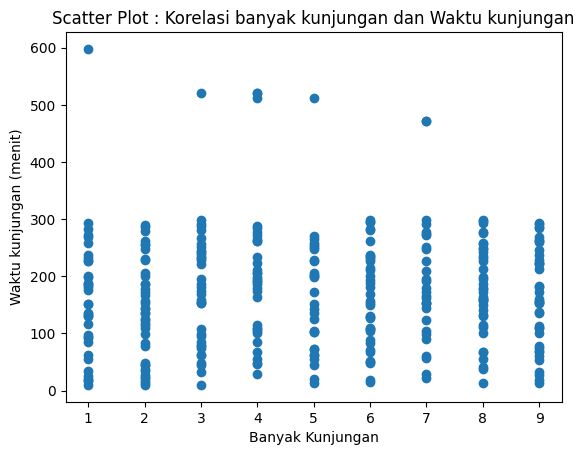

In [6]:
plt.scatter(df['Banyak_Kunjungan'],df['Lama_Kunjungan'])
plt.xlabel('Banyak Kunjungan')
plt.ylabel('Waktu kunjungan (menit)')
plt.title('Scatter Plot : Korelasi banyak kunjungan dan Waktu kunjungan')
plt.show()

**Histogram**

Laura membuat histogram untuk mengamati distribusi usia pengunjung selama beberapa minggu sebelum pencurian. Dia memperhatikan adanya kelompok usia tertentu yang cenderung lebih banyak berkunjung pada hari itu, yang dimana mungkin pencuri memiliki umur dalam rentang umur tersebut sehingga mudah membaur dengan sekitar.

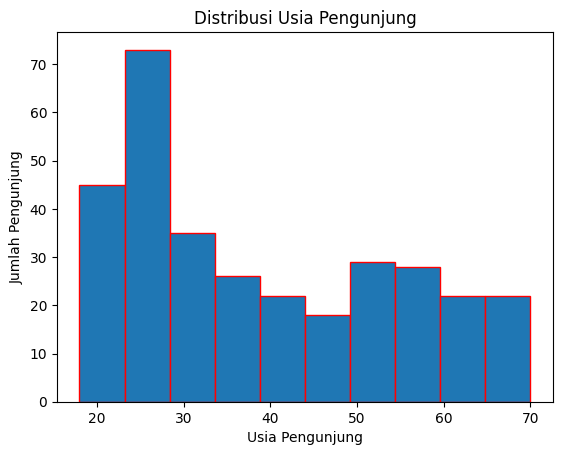

In [7]:
plt.hist(df['Usia'], bins = 10, edgecolor="red")
plt.xlabel('Usia Pengunjung')
plt.ylabel('Jumlah Pengunjung')
plt.title('Distribusi Usia Pengunjung')
plt.show()

**Box Plot (Diagram Kotak)**

Laura membuat box plot untuk melihat waktu yang dihabiskan oleh pengunjung di area berlian. Dia menemukan adanya pengunjung yang menghabiskan waktu yang tidak lazim di area berlian pada hari pencurian.

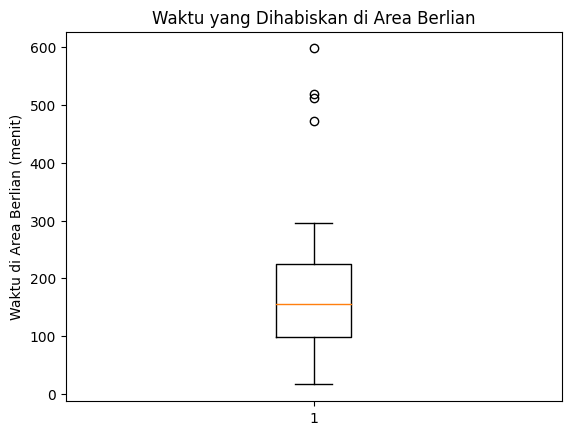

In [8]:
area_berlian = df[df['Area_Dominan'] == 'Berlian']

plt.boxplot(area_berlian['Lama_Kunjungan'])
plt.ylabel('Waktu di Area Berlian (menit)')
plt.title('Waktu yang Dihabiskan di Area Berlian')
plt.show()

**Pie Chart (Diagram Lingkaran)**

Laura membuat diagram lingkaran untuk membandingkan proporsi pengunjung reguler dengan pengunjung baru. Dia mencurigai bahwa pencuri mungkin adalah pengunjung baru yang mencari peluang untuk melancarkan aksinya.

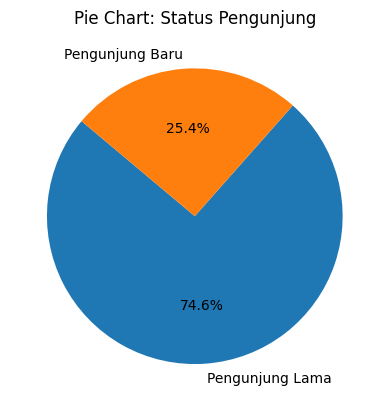

In [9]:
visitor_type_counts = area_berlian['Status_Pengunjung'].value_counts()
plt.pie(visitor_type_counts, labels=['Pengunjung Lama', 'Pengunjung Baru'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Status Pengunjung')
plt.show()

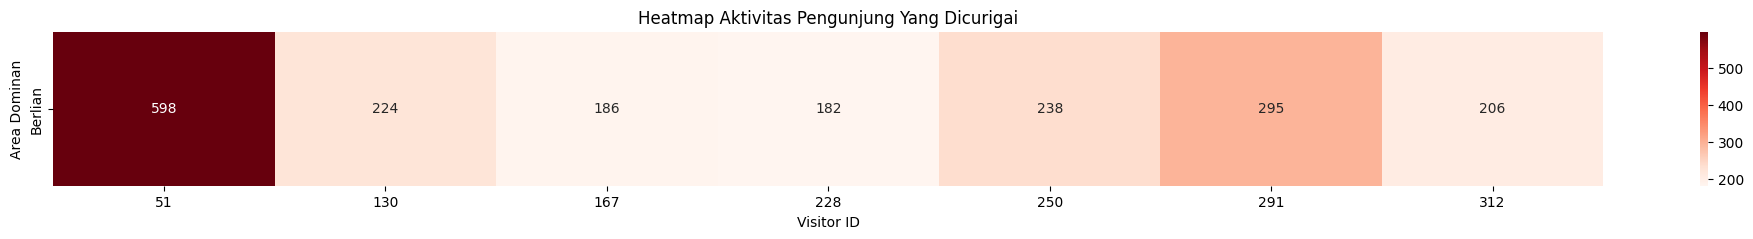

In [10]:
tersangka = df[(df['Area_Dominan'] == 'Berlian') &
               (df['Usia'] > 20) & (df['Usia'] < 30) &
               (df['Lama_Kunjungan'] > df['Lama_Kunjungan'].mean()) &
               (df['Status_Pengunjung'] == 0 )]

heatmap_data = tersangka.pivot_table(index='Area_Dominan', columns='Visitor_ID', values='Lama_Kunjungan', aggfunc='sum')

plt.figure(figsize=(25, 2))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='g')
plt.title('Heatmap Aktivitas Pengunjung Yang Dicurigai')
plt.xlabel('Visitor ID')
plt.ylabel('Area Dominan')
plt.show()

In [11]:
tersangka = df[df['Visitor_ID'] == 51].iloc[:, :]

Pengunjung_Tersangka = tersangka.T
print(Pengunjung_Tersangka)

                            50
Visitor_ID                  51
Nama                Jim Russel
No_KTP             592-12-5349
Usia                        25
Lama_Kunjungan             598
Status_Pengunjung            0
Area_Dominan           Berlian
Banyak_Kunjungan             1
